# Imports

In [60]:
import numpy as np

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , mean_absolute_percentage_error

import tensorflow as tf
from tensorflow.keras.layers import LSTM , Dropout , Dense
from tensorflow.keras.models import Sequential
import pandas_datareader as pdd
import datetime

import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/Equity/NSE50.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.index = df['Date']
df.drop(df[df['High']==df['Low']].index , axis=0 , inplace=True)
df.head()

,Ticker,Date,Time,Open,High,Low,Close,Volume,OI
Date,,,,,,,,,
1995-11-03,NSE50,1995-11-03,00:00:00,994.0,1001.0,993.0,1000.0,12938015,0
1995-11-06,NSE50,1995-11-06,00:00:00,1002.0,1002.0,989.0,989.0,9711115,0
1995-11-07,NSE50,1995-11-07,00:00:00,987.0,987.0,977.0,978.0,10985070,0
1995-11-08,NSE50,1995-11-08,00:00:00,976.0,976.0,963.0,964.0,7272730,0
1995-11-09,NSE50,1995-11-09,00:00:00,960.0,960.0,952.0,953.0,7680380,0


In [3]:
df.drop(['Ticker' , 'Date' ,'Time', 'Volume' , 'OI '] , axis=1 , inplace=True)
df = df.loc['2011-01':]
data = df.copy()

In [4]:
# Training and testing data
train_size = int(len(data) *0.80)
train = data[:train_size]
test = data[train_size :]

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_close = scaler.fit_transform(np.array(train['Close']).reshape(-1,1))

In [6]:
scaled_open = scaler.transform(np.array(train['Open']).reshape(-1,1))
scaled_high = scaler.transform(np.array(train['High']).reshape(-1,1))
scaled_low = scaler.transform(np.array(train['Low']).reshape(-1,1))

In [7]:
open_list = []
close_list = []
high_list = []
low_list = []
for i in range(len(scaled_open)):
    open_list.append(scaled_open[i])
    high_list.append(scaled_high[i])
    low_list.append(scaled_low[i])
    close_list.append( scaled_close[i])

In [8]:
open_arr = np.array(open_list).reshape(-1,1)
high_arr = np.array(high_list).reshape(-1,1)
low_arr = np.array(low_list).reshape(-1,1)
close_arr = np.array(close_list).reshape(-1,1)

In [9]:
scaled_data = pd.DataFrame(open_arr , columns=['Open'])

In [10]:
scaled_data['High'] = high_arr
scaled_data['Low'] = low_arr
scaled_data['Close'] = close_arr

In [11]:
scaled_train = np.array(scaled_data)

In [12]:
X_train = []
y_train = []

for x in range(60,len(scaled_train)-1):
    temp = []
    for i in scaled_train[x-60 :x,]:
        temp.append(i[0] )
        temp.append(i[1])
        temp.append( i[2])
        temp.append(i[3])
        
    X_train.append(temp)
    
    y_train.append(scaled_train[x+1][3])

In [13]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [14]:
X_train[1] , y_train[0]

(array([0.22636669, 0.22752035, 0.21964607, 0.22269713, 0.22200213,
        0.22200213, 0.21102122, 0.21344671, 0.21722751, 0.21849933,
        0.20545427, 0.20906132, 0.20664967, 0.20947139, 0.18617516,
        0.18909414, 0.1886354 , 0.18946247, 0.16634697, 0.16939104,
        0.17009994, 0.1804762 , 0.16040477, 0.1681748 , 0.17456176,
        0.18486858, 0.1622256 , 0.18334652, 0.18160903, 0.18258202,
        0.16575623, 0.16786897, 0.1678968 , 0.17923213, 0.15226634,
        0.15433741, 0.15353817, 0.16011978, 0.15011186, 0.15436524,
        0.15822938, 0.16489441, 0.15665872, 0.16399784, 0.16584656,
        0.16727822, 0.1554494 , 0.15941087, 0.15453899, 0.16474849,
        0.15155051, 0.16226734, 0.15954987, 0.16309434, 0.15711047,
        0.16016844, 0.16303184, 0.16843888, 0.16034219, 0.16666664,
        0.16945354, 0.17477025, 0.1579653 , 0.15890354, 0.16417158,
        0.16428283, 0.14605313, 0.14735271, 0.14870103, 0.14875662,
        0.12723262, 0.13454398, 0.12625963, 0.13

In [15]:
test_scaled_close = scaler.transform(np.array(test['Close']).reshape(-1,1))
test_scaled_open = scaler.transform(np.array(test['Open']).reshape(-1,1))
test_scaled_high = scaler.transform(np.array(test['High']).reshape(-1,1))
test_scaled_low = scaler.transform(np.array(test['Low']).reshape(-1,1))

In [16]:
open_list = []
close_list = []
high_list = []
low_list = []
for i in range(len(test_scaled_open)):
    open_list.append(test_scaled_open[i])
    high_list.append(test_scaled_high[i])
    low_list.append(test_scaled_low[i])
    close_list.append( test_scaled_close[i])

In [17]:
open_arr = np.array(open_list).reshape(-1,1)
high_arr = np.array(high_list).reshape(-1,1)
low_arr = np.array(low_list).reshape(-1,1)
close_arr = np.array(close_list).reshape(-1,1)

In [18]:
scaled_data = pd.DataFrame(open_arr , columns=['Open'])
scaled_data['High'] = high_arr
scaled_data['Low'] = low_arr
scaled_data['Close'] = close_arr

In [19]:
scaled_test = np.array(scaled_data)

In [20]:
X_test = []
y_test = []

for x in range(60,len(scaled_test)-1):
    temp = []
    for i in scaled_test[x-60 :x,]:
        temp.append(i[0] )
        temp.append(i[1])
        temp.append( i[2])
        temp.append(i[3])
        
    X_test.append(temp)
    
    y_test.append(scaled_test[x+1][3])

In [21]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [22]:
lstm = Sequential()
lstm.add(LSTM(250 ,return_sequences=True ,  input_shape=(240,1)))
lstm.add(LSTM(250 , return_sequences = True))
lstm.add(LSTM(250))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error' , optimizer='adam' , metrics=['accuracy','mse'])

In [23]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 240, 250)          252000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 240, 250)          501000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 250)               501000    
_________________________________________________________________
dense (Dense)                (None, 1)                 251       
Total params: 1,254,251
Trainable params: 1,254,251
Non-trainable params: 0
_________________________________________________________________


In [30]:
X_train = X_train.reshape((-1,240 , 1))
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape((-1,240,1))
y_train = y_train.reshape(-1,1)

In [25]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='./models/lstm10',
                                              save_weights_only=True,
                                              verbose=1)

In [26]:
lstm.fit(X_train ,y_train , validation_data=(X_test,y_test) ,epochs=100 , batch_size=64 ,verbose=1 , callbacks=[callback] )

Epoch 1/100
30/30 [==============================] - 74s 2s/step - loss: 0.1013 - accuracy: 7.1265e-04 - mse: 0.1013 - val_loss: 0.0348 - val_accuracy: 0.0000e+00 - val_mse: 0.0348

Epoch 00001: saving model to ./models/lstm10
Epoch 2/100
30/30 [==============================] - 65s 2s/step - loss: 0.0020 - accuracy: 0.0013 - mse: 0.0020 - val_loss: 0.0053 - val_accuracy: 0.0000e+00 - val_mse: 0.0053

Epoch 00002: saving model to ./models/lstm10
Epoch 3/100
30/30 [==============================] - 66s 2s/step - loss: 4.2688e-04 - accuracy: 7.7561e-04 - mse: 4.2688e-04 - val_loss: 0.0057 - val_accuracy: 0.0000e+00 - val_mse: 0.0057

Epoch 00003: saving model to ./models/lstm10
Epoch 4/100
30/30 [==============================] - 69s 2s/step - loss: 3.7196e-04 - accuracy: 5.9627e-04 - mse: 3.7196e-04 - val_loss: 0.0051 - val_accuracy: 0.0000e+00 - val_mse: 0.0051

Epoch 00004: saving model to ./models/lstm10
Epoch 5/100
30/30 [==============================] - 70s 2s/step - loss: 3.5677e

30/30 [==============================] - 69s 2s/step - loss: 3.6080e-04 - accuracy: 0.0011 - mse: 3.6080e-04 - val_loss: 0.0032 - val_accuracy: 0.0000e+00 - val_mse: 0.0032

Epoch 00071: saving model to ./models/lstm10
Epoch 72/100
30/30 [==============================] - 72s 2s/step - loss: 2.9557e-04 - accuracy: 7.6415e-04 - mse: 2.9557e-04 - val_loss: 0.0031 - val_accuracy: 0.0000e+00 - val_mse: 0.0031

Epoch 00072: saving model to ./models/lstm10
Epoch 73/100
30/30 [==============================] - 70s 2s/step - loss: 2.8161e-04 - accuracy: 0.0018 - mse: 2.8161e-04 - val_loss: 0.0031 - val_accuracy: 0.0000e+00 - val_mse: 0.0031

Epoch 00073: saving model to ./models/lstm10
Epoch 74/100
30/30 [==============================] - 85s 3s/step - loss: 3.1118e-04 - accuracy: 6.3659e-04 - mse: 3.1118e-04 - val_loss: 0.0037 - val_accuracy: 0.0000e+00 - val_mse: 0.0037

Epoch 00074: saving model to ./models/lstm10
Epoch 75/100
30/30 [==============================] - 94s 3s/step - loss: 2.9

In [22]:
lstm= tf.keras.models.load_model('./models/lstm10.h5')

In [31]:
training_predictions = lstm.predict(X_train)

In [32]:
print('Mean Squared Error : {}'.format(mean_squared_error(scaler.inverse_transform(np.array(y_train).reshape(-1,1)) ,scaler.inverse_transform(training_predictions) )))
print('Mean Absolute Error : {}'.format(mean_absolute_error(scaler.inverse_transform(np.array(y_train).reshape(-1,1)) ,scaler.inverse_transform(training_predictions))))

Mean Squared Error : 12193.882368154236
Mean Absolute Error : 86.1369714730016


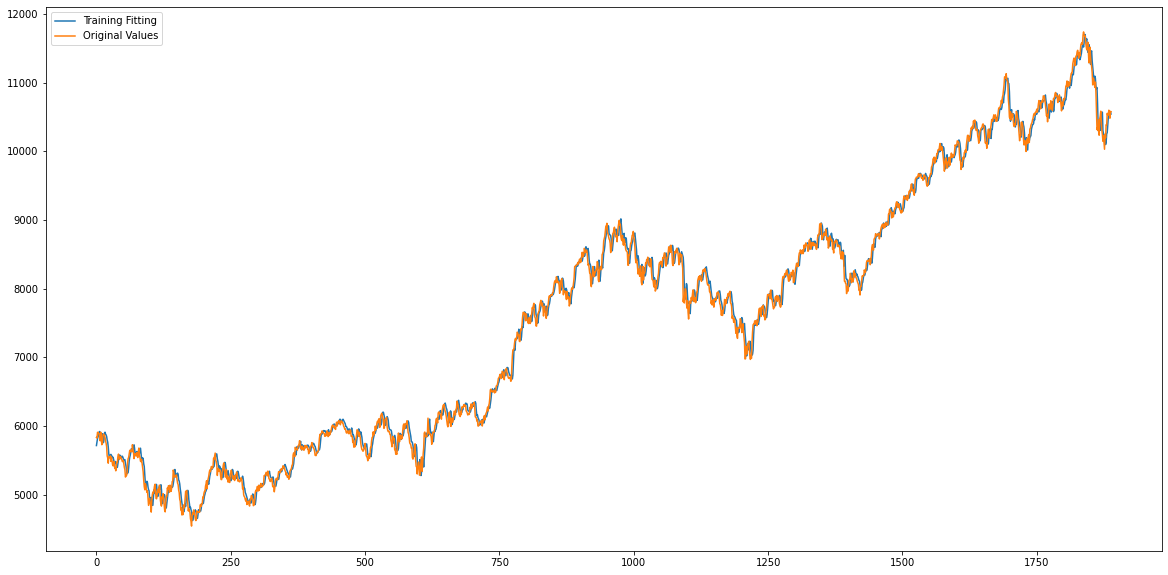

In [33]:
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(training_predictions) , label='Training Fitting')
plt.plot(scaler.inverse_transform(np.array(y_train).reshape(-1,1)) ,label='Original Values')
plt.legend()
plt.show()

In [34]:
preds = lstm.predict(X_test)

In [35]:
print('Mean Squared Error : {}'.format(mean_squared_error(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,scaler.inverse_transform(preds) )))
print('Mean Absolute Error : {}'.format(mean_absolute_error(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,scaler.inverse_transform(preds))))

Mean Squared Error : 148716.84554593105
Mean Absolute Error : 201.1174058676083


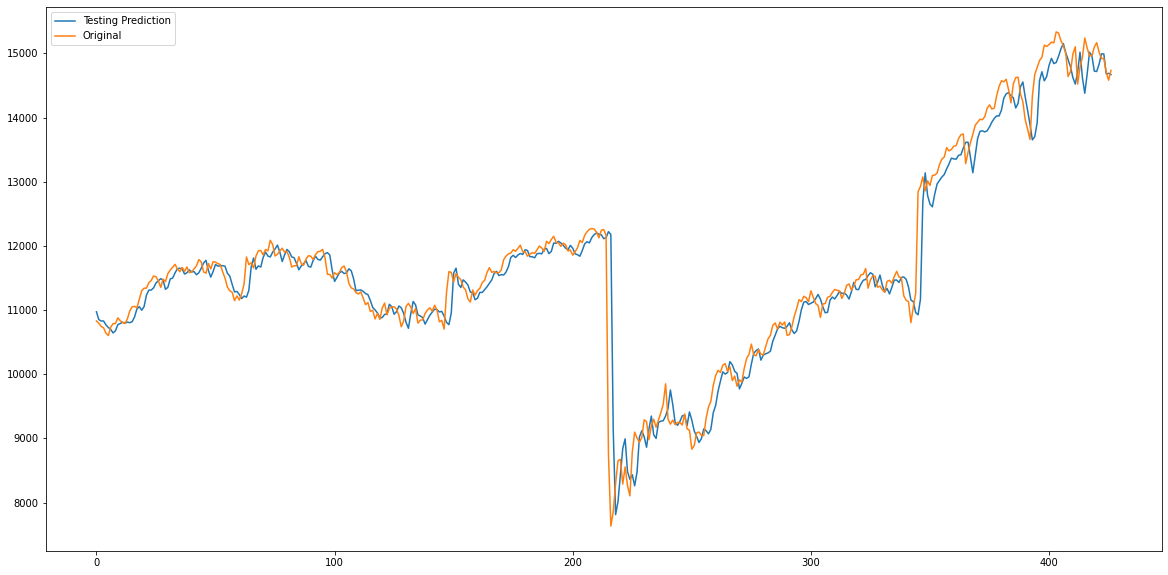

In [36]:
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(preds) , label='Testing Prediction')
plt.plot(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,label='Original')
plt.legend()
plt.show()

In [26]:
# lstm.save_weights('./models/lstm240.weights')
lstm.save('./models/lstm10.h5')

In [37]:
lstm2 = tf.keras.models.load_model('./models/lstm240.h5')

In [38]:
lstm2_preds = lstm2.predict(X_test)

In [39]:
scaled_original = scaler.inverse_transform(np.array(y_test).reshape(-1,1))
scaled_lstm10 = scaler.inverse_transform(preds)
scaled_lstm25 = scaler.inverse_transform(lstm2_preds)

In [40]:
scaled_original = scaled_original.reshape(1,-1).tolist()
scaled_lstm10  = scaled_lstm10.reshape(1,-1).tolist()
scaled_lstm25 = scaled_lstm25.reshape(1,-1).tolist()

In [41]:
index = test[61:].index

In [42]:
data = {'Original':scaled_original[0] ,
        'last 10 years model prediction': scaled_lstm10[0] ,
        'last 25 years model prediction':scaled_lstm25[0]}

In [43]:
df = pd.DataFrame(data=data , index =index)

In [45]:
df.to_csv('./export.csv')

In [46]:
print('Mean Absolute Percentage Error : {}'.format(mean_absolute_percentage_error(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,scaler.inverse_transform(preds) )))

Mean Absolute Percentage Error : 0.01805795691144787


In [47]:
print('Mean Absolute Percentage Error : {}'.format(mean_absolute_percentage_error(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,scaler.inverse_transform(lstm2_preds) )))

Mean Absolute Percentage Error : 0.016685603036613032


In [48]:
print('Mean Absolute Percentage Error : {}'.format(mean_absolute_percentage_error(scaler.inverse_transform(np.array(y_train).reshape(-1,1)) ,scaler.inverse_transform(training_predictions) )))

Mean Absolute Percentage Error : 0.011982734133369132


In [49]:
df.loc['2021-03-03']

Original                          15240.500000
last 10 years model prediction    14379.541016
last 25 years model prediction    14749.827148
Name: 2021-03-03 00:00:00, dtype: float64

In [50]:
df1 = pd.read_csv('../../data/Equity/NSE50.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
df1.index = df1['Date']
df1.drop(df1[df1['High']==df1['Low']].index , axis=0 , inplace=True)
df1.head()

,Ticker,Date,Time,Open,High,Low,Close,Volume,OI
Date,,,,,,,,,
1995-11-03,NSE50,1995-11-03,00:00:00,994.0,1001.0,993.0,1000.0,12938015,0
1995-11-06,NSE50,1995-11-06,00:00:00,1002.0,1002.0,989.0,989.0,9711115,0
1995-11-07,NSE50,1995-11-07,00:00:00,987.0,987.0,977.0,978.0,10985070,0
1995-11-08,NSE50,1995-11-08,00:00:00,976.0,976.0,963.0,964.0,7272730,0
1995-11-09,NSE50,1995-11-09,00:00:00,960.0,960.0,952.0,953.0,7680380,0


In [51]:
df1.loc['2021-03-03']

Ticker                  NSE50
Date      2021-03-03 00:00:00
Time                 00:00:00
Open               15064.7998
High               15273.1504
Low                14995.7998
Close                 15240.5
Volume                    375
OI                          0
Name: 2021-03-03 00:00:00, dtype: object

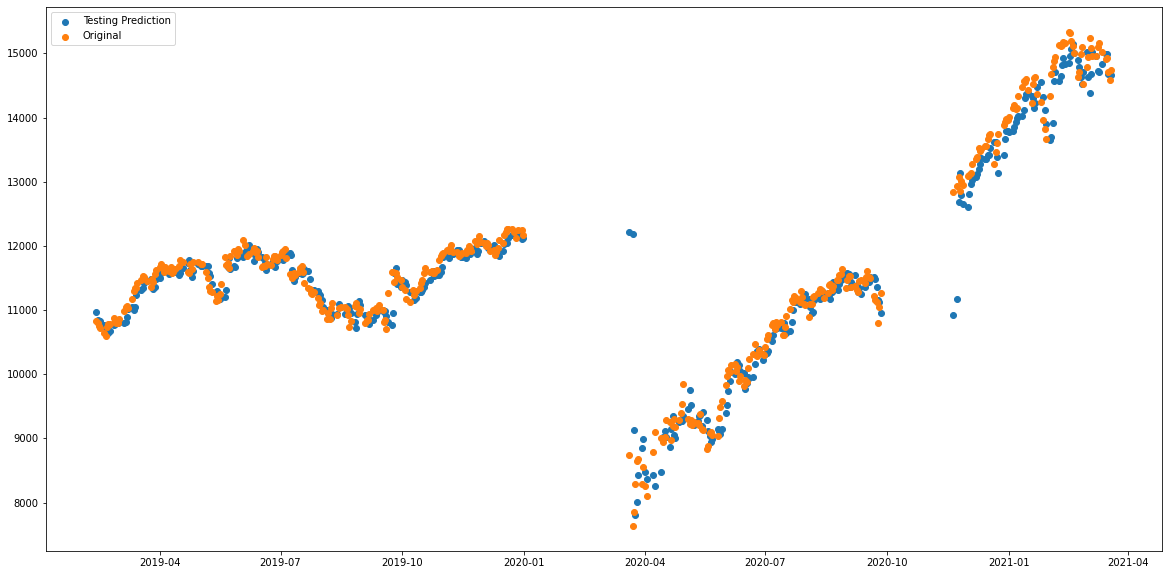

In [52]:
plt.figure(figsize=(20,10))
plt.scatter(index , scaler.inverse_transform(preds) , label='Testing Prediction')
plt.scatter(index , scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,label='Original')
plt.legend()
plt.show()

In [57]:
df1.loc['2020-01':]

,Ticker,Date,Time,Open,High,Low,Close,Volume,OI
Date,,,,,,,,,
2020-03-20,NSE50,2020-03-20,00:00:00,8284.4502,8882.5996,8178.3999,8749.7002,0,0
2020-03-23,NSE50,2020-03-23,00:00:00,7945.7002,8355.5498,7583.6001,7634.6001,0,0
2020-03-24,NSE50,2020-03-24,00:00:00,7848.2998,8036.9502,7511.1001,7856.7998,0,0
2020-03-25,NSE50,2020-03-25,00:00:00,7735.1499,8376.7500,7714.7500,8297.7998,0,0
2020-03-26,NSE50,2020-03-26,00:00:00,8451.0000,8749.0498,8304.9004,8653.5498,0,0
...,...,...,...,...,...,...,...,...,...
2021-03-15,NSE50,2021-03-15,00:00:00,15038.5498,15044.9004,14745.8496,14920.9004,358,0
2021-03-16,NSE50,2021-03-16,00:00:00,15005.2002,15051.5996,14890.6504,14922.0000,375,0
2021-03-17,NSE50,2021-03-17,00:00:00,14955.7002,14956.5498,14696.0498,14709.2500,375,0


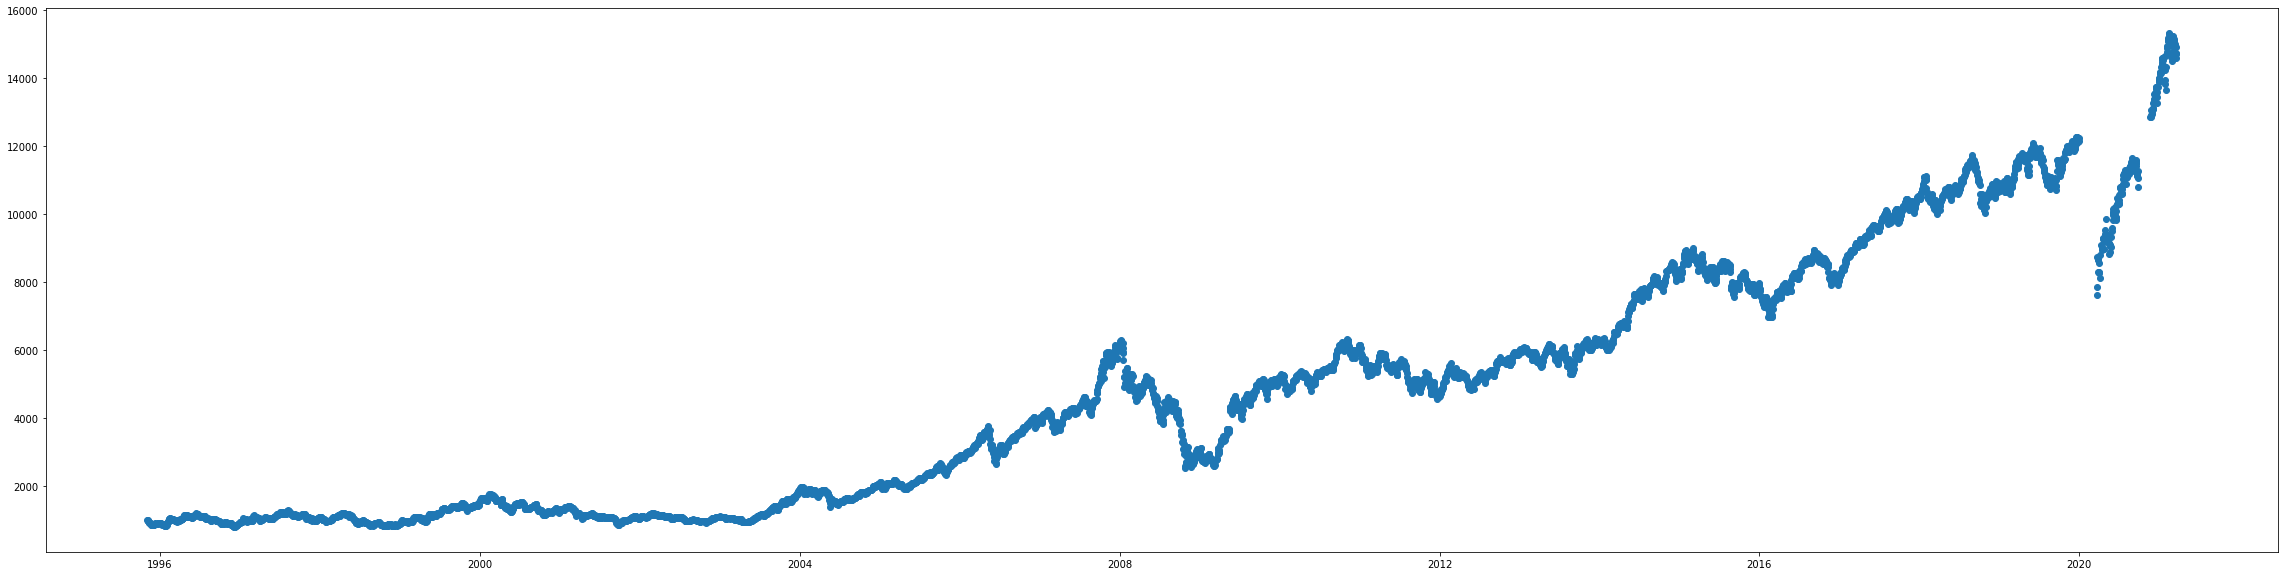

In [54]:
plt.figure(figsize=(40,10))
plt.scatter(df1.index , df1['Close'])
plt.show()

In [61]:
start = datetime.datetime(1995,  11 , 3)
end = datetime.datetime.now()

In [91]:
full_data = pdd.DataReader('^NSEI' , 'yahoo' , start=start , end=end)

In [92]:
full_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-09-17,4549.049805,4482.850098,4518.450195,4494.649902,0.0,4494.649902
2007-09-18,4551.799805,4481.549805,4494.100098,4546.200195,0.0,4546.200195
2007-09-19,4739.000000,4550.250000,4550.250000,4732.350098,0.0,4732.350098
2007-09-20,4760.850098,4721.149902,4734.850098,4747.549805,0.0,4747.549805
2007-09-21,4855.700195,4733.700195,4752.950195,4837.549805,0.0,4837.549805


In [93]:
index[-1]

Timestamp('2021-03-19 00:00:00')

In [94]:
index[0]

Timestamp('2019-02-12 00:00:00')

In [95]:
testing_data = full_data.loc['2019-02-12':]

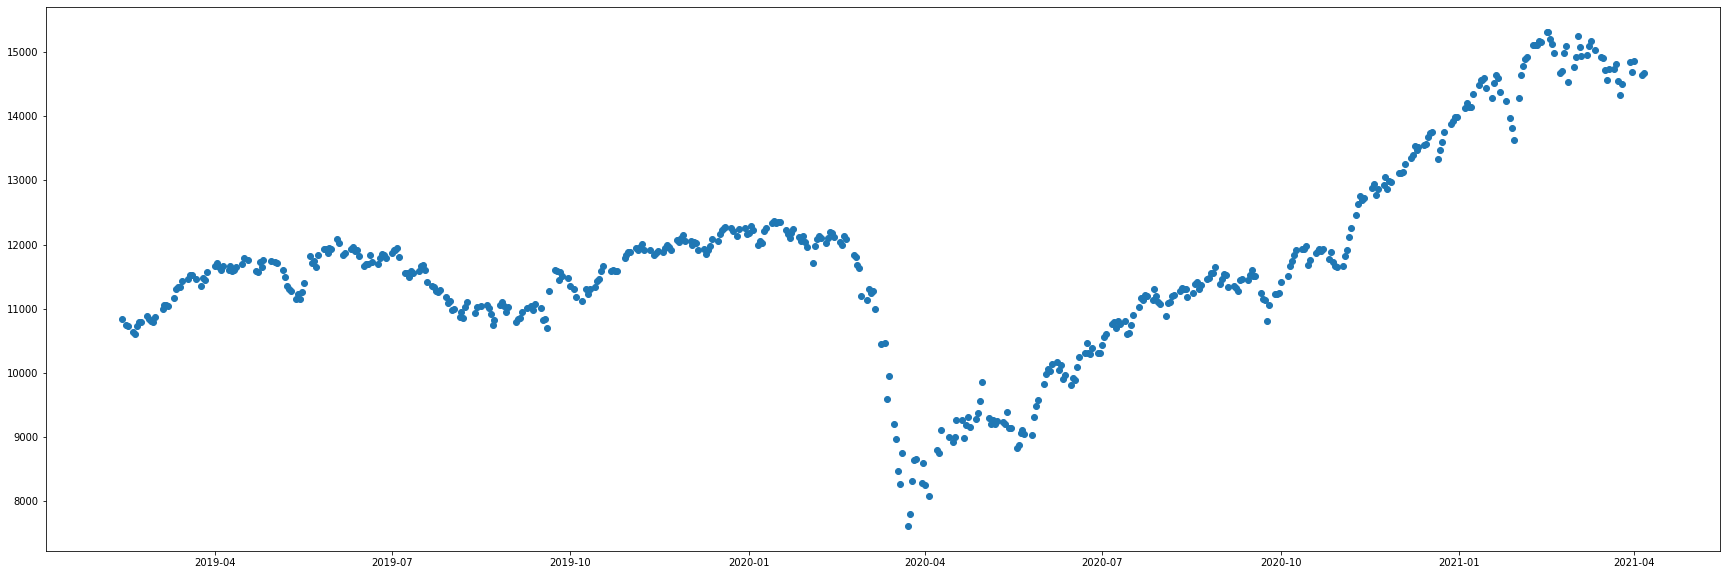

In [96]:
plt.figure(figsize=(30,10))
plt.scatter(testing_data.index , testing_data['Close'])
plt.show()

In [97]:
testing_data.loc['2020-01':]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,12222.200195,12165.299805,12202.150391,12182.500000,304100.0,12182.500000
2020-01-02,12289.900391,12195.250000,12198.549805,12282.200195,407700.0,12282.200195
2020-01-03,12265.599609,12191.349609,12261.099609,12226.650391,428800.0,12226.650391
2020-01-06,12179.099609,11974.200195,12170.599609,11993.049805,396500.0,11993.049805
2020-01-07,12152.150391,12005.349609,12079.099609,12052.950195,447800.0,12052.950195
...,...,...,...,...,...,...
2021-03-30,14876.299805,14617.599609,14628.500000,14845.099609,594500.0,14845.099609
2021-03-31,14813.750000,14670.250000,14811.849609,14690.700195,463900.0,14690.700195
2021-04-01,14883.200195,14692.450195,14798.400391,14867.349609,445000.0,14867.349609


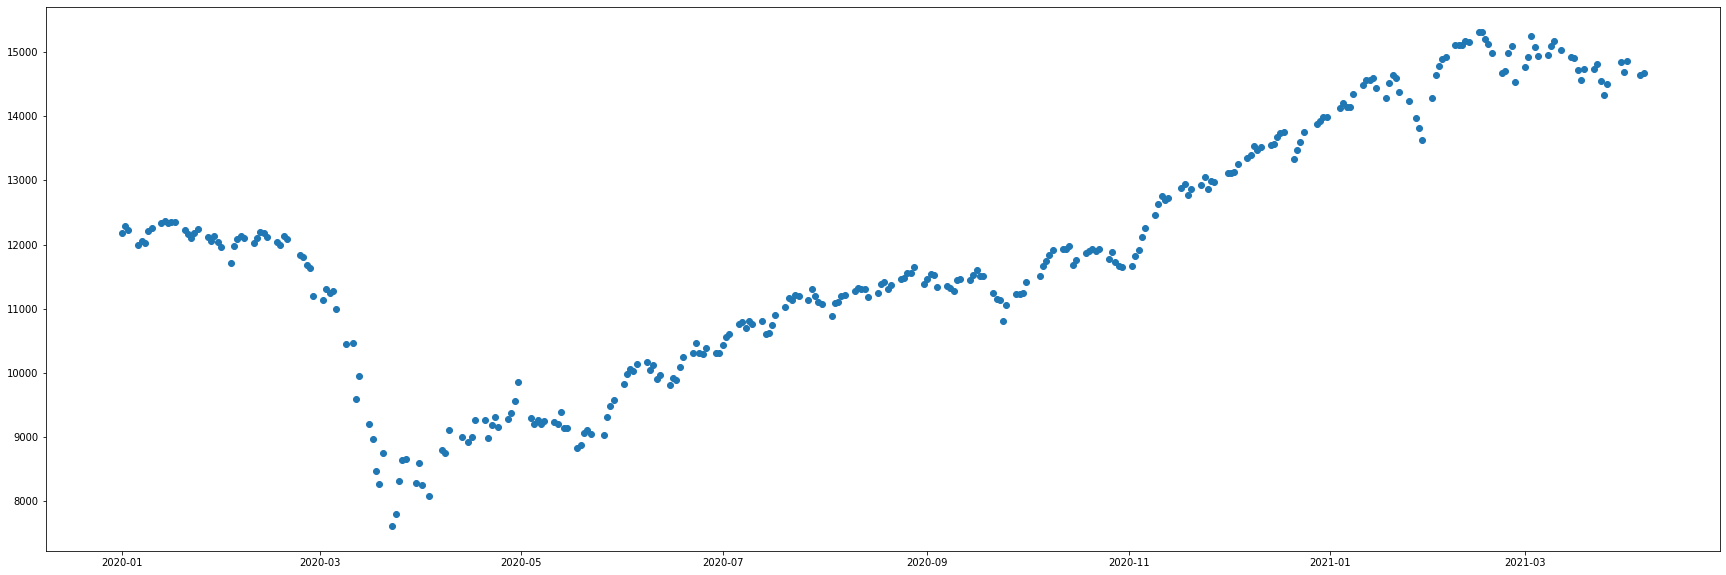

In [98]:
plt.figure(figsize=(30,10))
plt.scatter(testing_data.loc['2020-01':].index , testing_data.loc['2020-01':]['Close'])
plt.show()

In [99]:
testing_data.loc['2020-01':'2020-02']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,12222.200195,12165.299805,12202.150391,12182.500000,304100.0,12182.500000
2020-01-02,12289.900391,12195.250000,12198.549805,12282.200195,407700.0,12282.200195
2020-01-03,12265.599609,12191.349609,12261.099609,12226.650391,428800.0,12226.650391
2020-01-06,12179.099609,11974.200195,12170.599609,11993.049805,396500.0,11993.049805
2020-01-07,12152.150391,12005.349609,12079.099609,12052.950195,447800.0,12052.950195
2020-01-08,12044.950195,11929.599609,11939.099609,12025.349609,446000.0,12025.349609
2020-01-09,12224.049805,12132.549805,12153.150391,12215.900391,477500.0,12215.900391
2020-01-10,12311.200195,12213.200195,12271.000000,12256.799805,660600.0,12256.799805
2020-01-13,12337.750000,12285.799805,12296.700195,12329.549805,501000.0,12329.549805


In [100]:
test_scaled_close = scaler.transform(np.array(testing_data['Close']).reshape(-1,1))
test_scaled_open = scaler.transform(np.array(testing_data['Open']).reshape(-1,1))
test_scaled_high = scaler.transform(np.array(testing_data['High']).reshape(-1,1))
test_scaled_low = scaler.transform(np.array(testing_data['Low']).reshape(-1,1))

In [101]:
open_list = []
close_list = []
high_list = []
low_list = []
for i in range(len(test_scaled_open)):
    open_list.append(test_scaled_open[i])
    high_list.append(test_scaled_high[i])
    low_list.append(test_scaled_low[i])
    close_list.append( test_scaled_close[i])

In [102]:
open_arr = np.array(open_list).reshape(-1,1)
high_arr = np.array(high_list).reshape(-1,1)
low_arr = np.array(low_list).reshape(-1,1)
close_arr = np.array(close_list).reshape(-1,1)

In [103]:
scaled_data = pd.DataFrame(open_arr , columns=['Open'])
scaled_data['High'] = high_arr
scaled_data['Low'] = low_arr
scaled_data['Close'] = close_arr

In [104]:
scaled_test = np.array(scaled_data)

In [105]:
X_test = []
y_test = []

for x in range(60,len(scaled_test)-1):
    temp = []
    for i in scaled_test[x-60 :x,]:
        temp.append(i[0] )
        temp.append(i[1])
        temp.append( i[2])
        temp.append(i[3])
        
    X_test.append(temp)
    
    y_test.append(scaled_test[x+1][3])

In [106]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [107]:
X_train = X_train.reshape((-1,240 , 1))
y_train = y_train.reshape(-1,1)
X_test = X_test.reshape((-1,240,1))
y_train = y_train.reshape(-1,1)

In [108]:
preds = lstm.predict(X_test)

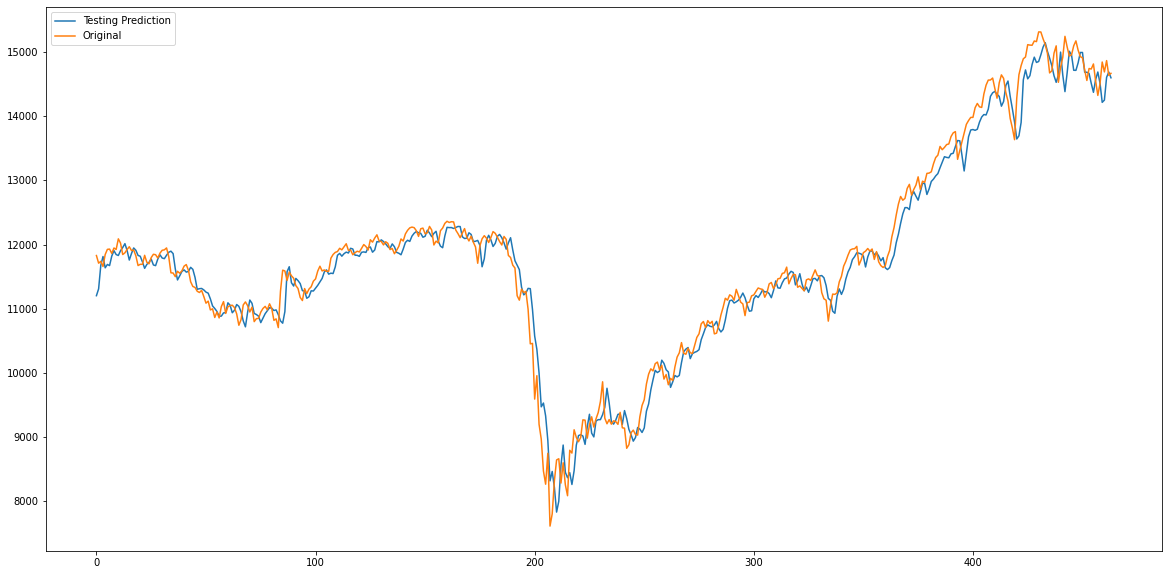

In [109]:
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(preds) , label='Testing Prediction')
plt.plot(scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,label='Original')
plt.legend()
plt.show()

In [115]:
testing_data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-30,14876.299805,14617.599609,14628.500000,14845.099609,594500.0,14845.099609
2021-03-31,14813.750000,14670.250000,14811.849609,14690.700195,463900.0,14690.700195
2021-04-01,14883.200195,14692.450195,14798.400391,14867.349609,445000.0,14867.349609
2021-04-05,14849.849609,14459.500000,14837.700195,14637.799805,509700.0,14637.799805
2021-04-06,14779.099609,14573.900391,14737.000000,14669.299805,0.0,14669.299805


In [124]:
scaler.inverse_transform(preds[-1].reshape(-1,1))

array([[14599.274]], dtype=float32)

In [128]:
preds.shape

(464, 1)

In [130]:
testing_data.shape

(525, 6)

ValueError: x and y must be the same size

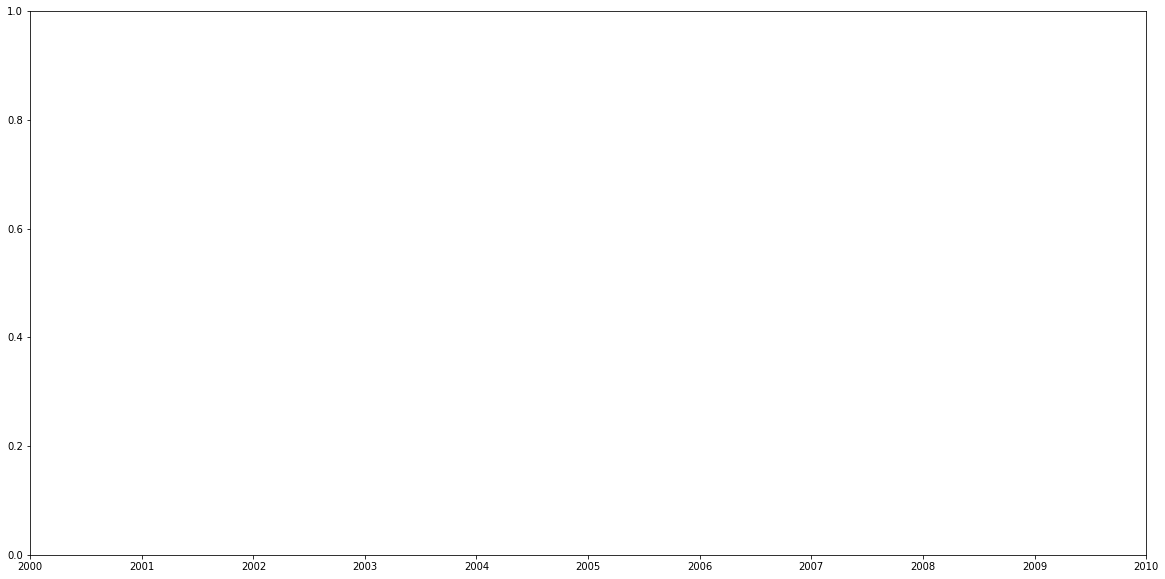

In [127]:
plt.figure(figsize=(20,10))
plt.scatter(testing_data.index , scaler.inverse_transform(preds) , label='Testing Prediction')
plt.scatter(testing_data.index ,scaler.inverse_transform(np.array(y_test).reshape(-1,1)) ,label='Original')
plt.legend()
plt.show()